### iris 꽃 종류 분류를 위한 시각화

- K Nearest Neighbors

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # 아이리스 데이터 불러오기

In [30]:
iris = load_iris() # 아이리스 데이터 확인
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
iris.keys() # 아이리스데이터 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [32]:
iris.target_names # 타겟 확인(예측하려는 값)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
iris.feature_names # 꽃의 특성 확인 (4개)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
iris.target # 타겟값 확인 0 1 2 (3종류)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
from sklearn.model_selection import train_test_split # train, test 분리 및 모양 확인
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [36]:
from sklearn.neighbors import KNeighborsClassifier # k 최근접 이웃 알고리즘
# from sklearn.linear_model import LogisticRegression #classification
# Log = LogisticRegression()
# Log.fit(X_train,y_train)
knn = KNeighborsClassifier(n_neighbors = 1) # 가장 가까운 이웃 하나를 기준으로 분류
knn.fit(X_train,y_train) # fit 매서드로 훈련
# 주어진 데이터를 기반으로 이웃을 찾고, 입력 데이터와 이웃의 타겟 변수를 비교하여 분류 모델을 학습

KNeighborsClassifier(n_neighbors=1)

In [37]:
#모델 만들기
from sklearn.neighbors import KNeighborsClassifier 
for i in (1,3,5,7):
    for j in ('uniform','distance'):
        for k in ('auto','ball_tree','kd_tree','brute'):
            model = KNeighborsClassifier(n_neighbors=i, weights=j,algorithm=k)
            model.fit(X_train,y_train)
            y_p = model.predict(X_test)
            relation_square = model.score(X_test,y_test)
            from sklearn.metrics import confusion_matrix, classification_report
            knn_matrix = confusion_matrix(y_test,y_p)
            print(knn_matrix)
            target_names = ['setosa','versicolor','virginica']
            knn_result = classification_report(y_test,y_p,target_names=target_names)
            print(knn_result)
    print('\n')
print('\n')

[[14  0  0]
 [ 0  8  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[14  0  0]
 [ 0  8  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[14  0  0]
 [ 0  8  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor      

c:\Users\405\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\405\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

[[14  0  0]
 [ 0  8  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[14  0  0]
 [ 0  8  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[14  0  0]
 [ 0  8  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor      

In [38]:
print('accuracy:{:.2f}'.format(knn.score(X_test,y_test)))

accuracy:0.97


c:\Users\405\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [39]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train, y_train)
print('accuracy:{:.2f}'.format(DT.score(X_test,y_test)))

accuracy:0.93


[Text(0.5, 0.9, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [36, 42, 42]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'X[3] <= 1.75\ngini = 0.5\nsamples = 84\nvalue = [0, 42, 42]'),
 Text(0.3076923076923077, 0.5, 'X[2] <= 5.05\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(0.15384615384615385, 0.3, 'X[0] <= 4.95\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.46153846153846156, 0.3, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8461538461538461, 0.5, 'X[2] <= 4.85\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7692307692307693, 0.3, 'X[0] <= 5.

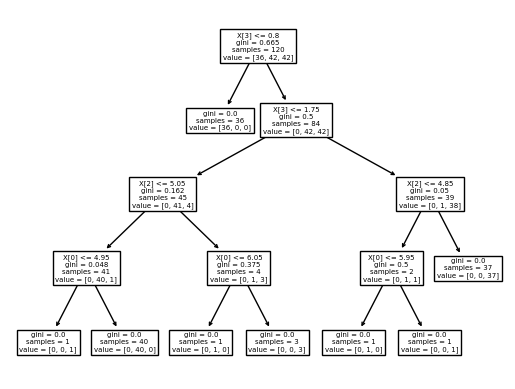

In [40]:
from sklearn import tree
tree.plot_tree(DT)

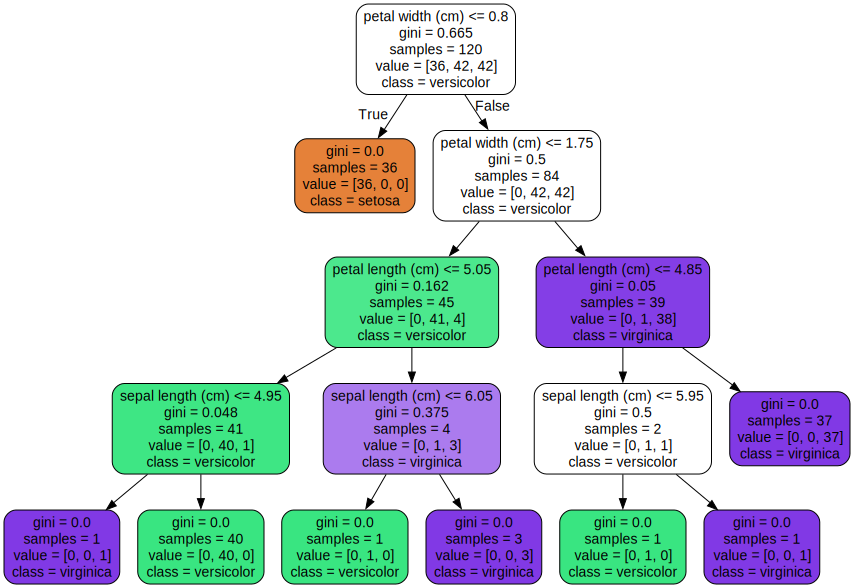

In [41]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(DT,# 모델
                out_file='iris_tree.dot',# 저장경로 설정
                feature_names=iris.feature_names, # 변수명
                class_names=iris.target_names, # 종속변수
                rounded=True,
                filled=True)
Source.from_file('iris_tree.dot')

Feature importances:
[0.056 0.    0.06  0.884]
sepal length (cm) : 0.056
sepal width (cm) : 0.000
petal length (cm) : 0.060
petal width (cm) : 0.884


<Axes: >

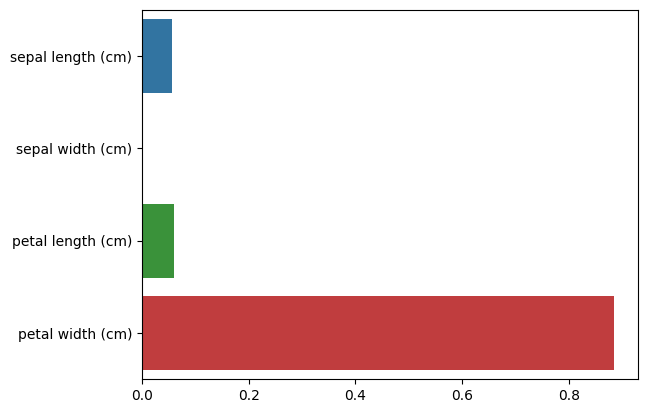

In [42]:
import seaborn as sns
# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(DT.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names , DT.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=DT.feature_importances_ , y=iris.feature_names)

- 결론
  - KNN의 장단점 그리고 언제 활용을 해야하는지 다음과 같이 심플하게 정리해 보았습니다.

- 장점

  - 쉬운 모델, 쉬운 알고리즘과 이해 (입문자가 샘플데이터를 활용할 때 좋음)
  - 튜닝할 hyperparameter 스트레스가 없음
  - 초기 시도해보기 좋은 시작점이 되는 모델
- 단점

  - 샘플 데이터가 늘어나면 예측시간도 늘어나기 때문에 매우 느려짐
  - pre-processing을 잘하지 않으면 좋은 성능을 기대하기 어려움
  - feature가 많은(수 백개 이상) 데이터셋에서는 좋은 성능을 기대하기 어려움
  - feature의 값이 대부분 0인 데이터셋과는 매우 안좋은 성능을 냄
  - 결론, kaggle과 현업에서는 더 좋은 대안들이 많기 때문에 자주 쓰이는 알고리즘은 아닙니다. 하지만, 초기에 학습을 목표로 해볼 필요는 있습니다!

- Naive baye(나이브 베이즈 분류)

ex) Label이 여러개인 나이브 베이즈

In [43]:
# import scikit-learn dataset library
from sklearn import datasets

# load dataset
wine=datasets.load_wine()

# print the name of the 13 features
print("Features:",wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels:",wine.target_names)

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels: ['class_0' 'class_1' 'class_2']


In [44]:
wine.data.shape

(178, 13)

In [45]:
wine.data[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [46]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [47]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# split dataset into training set and test set
# 70# training and 30% test

X_train, X_test, y_train, y_test=train_test_split(wine.data, wine.target, test_size=0.3,
                                                  random_state=2023)

# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# create a gaussian classifier
gnb=GaussianNB()

# train the model using the training sets
gnb.fit(X_train, y_train)

# predict the response for test dataset
y_pred=gnb.predict(X_test)

# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# model accuracy, how often is the classifier correct?
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9629629629629629


나이브 베이즈의 장단점


- 장점

1. 간단하고, 빠르며, 정확한 모델입니다.

2. computation cost가 작습니다. (따라서 빠릅니다.)

3. 큰 데이터셋에 적합합니다.

4. 연속형보다 이산형 데이터에서 성능이 좋습니다.

5. Multiple class 예측을 위해서도 사용할 수 있습니다.

- 단점

 - feature 간의 독립성이 있어야 합니다. 하지만 실제 데이터에서 모든 feature가 독립인 경우는 드뭅니다. 장점이 많지만 feature가 서로 독립이어야 한다는 크리티컬한 단점이 있습니다.

 - feature간 독립성이 있다는 말은 feature간에 서로 상관관계가 없다는 뜻입니다. X1과 X2라는 feature가 있을 때 X1이 증가하면 X2도 같이 증가한다고 합시다. 그럼 X1과 X2는 서로 상관관계가 있다고 말할 수 있고, 이는 X1과 X2가 독립성이 없다는 뜻입니다. X1과 X2가 독립성이 있으려면 X1이 증가하든 말든, X2에는 아무런 영향을 미치지 않아야 합니다. 하지만 우리가 얻을 수 있는 데이터에서는 feature간의 독립성이 항상 보장되지는 않습니다. 나이브 베이즈 모델은 feature간 독립성이 있다는 가정하에 성립되는 모델이기 때문에 실생활에서 바로 적용하기는 어려움있습니다.



 **결정트리와 앙상블**
 - 결정 트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘. 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음. 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하여, 이로 인한 과적합(Overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점이 있습니다.

 - 하지만 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용. 앙상블은 매우 많은 여러개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)을 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 예측 성능을 향상시키는데, 결정트리가 좋은 약한 학습기가 되기 때문(GBM, LightGBM etc)


# 결정트리(Dicision Tree)

- 일반적으로 쉽게 표현하는 방법은 if/else 로 스무고개 게임을 한다고 생각하면 된다.


- 결정 트리(Decision Tree, 의사결정트리, 의사결정나무라고도 함)는 분류(Classification)와 회귀(Regression) 모두 가능한 지도 학습 모델 중 하나입니다. 결정 트리는 스무고개 하듯이 예/아니오 질문을 이어가며 학습합니다. 매, 펭귄, 돌고래, 곰을 구분한다고 생각해봅시다. 매와 펭귄은 날개를 있고, 돌고래와 곰은 날개가 없습니다. '날개가 있나요?'라는 질문을 통해 매, 펭귄 / 돌고래, 곰을 나눌 수 있습니다. 매와 펭귄은 '날 수 있나요?'라는 질문으로 나눌 수 있고, 돌고래와 곰은 '지느러미가 있나요?'라는 질문으로 나눌 수 있습니다. 

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwlH1u%2FbtqwWZI9Xen%2FkFJDjGSFJAPxhyatC3Xhs0%2Fimg.png' width=700 height=300>
</figure>

특정 기준(질문)에 따라 데이터를 구분하는 모델을 결정 트리 모델이라고 함.

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdy5OwG%2FbtqDwdHofoT%2FNtDy9lqXkhWTRTwEz6txd0%2Fimg.png' width=700 height=300>
</figure>

많은 규칙이 있으면 분류를 결정하는 방식이 복잡해짐-> 과적합으로 이어지기 쉬움

**결론 :트리가 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음.** 
참고 : https://jaaamj.tistory.com/21



### 데이터의 균일도

<figure>
    <img src='https://blog.kakaocdn.net/dn/dhoo7N/btqDvzqEhPH/QdOsfkqc2hcwHISIh0peo1/img.png' width=700 height=300>
</figure>

참고 : https://jaaamj.tistory.com/21

위 그림에서는 C > B > A 순으로 균일도가 높다고 할 수 있습니다. C는 모두 파란색 공으로 데이터가 모두 균일한 상태입니다. B의 경우는 일부의 하얀색 공을 가지고 있지만 대부분 파란색 공으로 구성되어 있어 C다음으로 균일도가 높습니다


이러한 데이터 세트에서 균일도는 데이터를 구분하는데 있어서 필요한 정보의 양에 영향을 미치게 됩니다.

 

정보의 균일도를 측정하는 대표적인 방법에는 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니계수가 있습니다.

### 불순도(Impurity)


불순도(Impurity)란 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 뜻합니다. 아래 그림에서 위쪽 범주는 불순도가 낮고, 아래쪽 범주는 불순도가 높습니다. 바꾸어 말하면 위쪽 범주는 순도(Purity)가 높고, 아래쪽 범주는 순도가 낮습니다. 위쪽 범주는 다 빨간점인데 하나만 파란점이므로 불순도가 낮다고 할 수 있습니다. 반면 아래쪽 범주는 5개는 파란점, 3개는 빨간점으로 서로 다른 데이터가 많이 섞여 있어 불순도가 높습니다.


<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqLXhZ%2FbtqwWyZl6iV%2FUZnQbf9L5HAFzf6hFfxK71%2Fimg.png' width=400 height=300>
</figure>


출처: ratsgo's blog



한 범주에 하나의 데이터만 있다면 불순도가 최소(혹은 순도가 최대)이고, 한 범주 안에 서로 다른 두 데이터가 정확히 반반 있다면 불순도가 최대(혹은 순도가 최소)입니다. 결정 트리는 불순도를 최소화(혹은 순도를 최대화)하는 방향으로 학습을 진행합니다.

엔트로피(Entropy)는 불순도(Impurity)를 수치적으로 나타낸 척도입니다. 엔트로피가 높다는 것은 불순도가 높다는 뜻이고, 엔트로피가 낮다는 것은 불순도가 낮다는 뜻입니다. 엔트로피가 1이면 불순도가 최대입니다. 즉, 한 범주 안에 서로 다른 데이터가 정확히 반반 있다는 뜻입니다. 엔트로피가 0이면 불순도는 최소입니다. 한 범주 안에 하나의 데이터만 있다는 뜻입니다. 엔트로피를 구하는 공식은 아래와 같습니다

<figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FpL6pO%2FbtqwVDN1V94%2FTYgn5iFrPTfgdVwZhxVKl1%2Fimg.png' width=500 height=100>
</figure>

**Pi = 한 영역 안에 존재하는 데이터 가운데 범주 i에 속하는 데이터의 비율**






#### 정보 이득(Information Gain)

정보 이득은 엔트로피라는 개념을 기반으로 함. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. 즉, 1-엔트로피 지수. 결정트리는 이 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할


#### 지니 계수(Gini Index)

원래 결제학에서 불평등 지수를 나타낼 때 사용하는 계수. 경제학자인 코라도 지니(Corrado Gini)의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등함. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석 되어, 계수가 낮은 속성을 기준으로 분할.

순도와 관련해 부연설명을 드리면 A 영역에 속한 모든 레코드가 동일한 범주에 속할 경우(=불확실성 최소=순도 최대) 엔트로피는 0입니다. 반대로 범주가 둘뿐이고 해당 개체의 수가 동일하게 반반씩 섞여 있을 경우(=불확실성 최대=순도 최소) 엔트로피는 1의 값을 갖습니다. 엔트로피 외에 불순도 지표로 많이 쓰이는 지니계수(Gini Index) 공식은 아래와 같습니다.


<figure>
<img src='https://qph.fs.quoracdn.net/main-qimg-690a5cee77c5927cade25f26d1e53e77' width=500 height=500>
</figure>



아래는 범주가 두 개일 때 한쪽 범주에 속한 비율(p)에 따른 불순도의 변화량을 그래프로 나타낸 것입니다. 보시다시피 그 비율이 0.5(두 범주가 각각 반반씩 섞여 있는 경우)일 때 불순도가 최대임을 알 수가 있습니다. 오분류오차(misclassification error)는 따로 설명드리지 않은 지표인데요, 오분류오차는 엔트로피나 지니계수와 더불어 불순도를 측정할 수 있긴 하나 나머지 두 지표와 달리 미분이 불가능한 점 때문에 자주 쓰이지는 않는다고 합니다.


<figure>
<img src='http://i.imgur.com/n3MVwHW.png' width=500 height=500>
</figure>



참고 : ratgo's blog




#####  결정트리 주요 hyperparameter

1. max_depth
 - 트리의 최대 깊이를 규정
 - defualt 는 None.None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split 보다 작아질 때까지 게속 깊이를 증가시킴.
 - 깊이가 깊어지면, min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요

2. max_features
 - 최적의 분할을 위해 고려할 최대 피쳐 개수, 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행.
 - int 형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임.
 - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수) 즉 ${\sqrt {전체 피처}}$개수 만큼 선정.
 - 'auto'로 지정하면 sqrt와 동일
 - 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
 - 'None'은 전체 피처 선정

3. min_samples_split
 - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨.
 - 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
 - 과적합을 제어, 1로 설정하는 경우 분할되는 노드가 많아져서 과적합 가능성 증가
4. min_samples_leaf
 - 말단 노드(leaf)가 되기 위한 최소한의 샘플 데이터 수
 - min_samples_split와 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 클래스의 데이터가 극도로 작을 수 있으므로, 이 경우는 작게 설정 필요.

5. max_leaf_nodes
 - 말단 노드(Leaf)의 최대 개수.


**결정트리를 그리가 위해 graphviz를 이용함**



설치 참고 : https://wiznxt.tistory.com/776

### Building decision trees

In [48]:
# !pip install graphviz
# !pip install mglearn
# !pip install --upgrade joblib==1.1.0
# !pip install scikit-learn==1.0.2

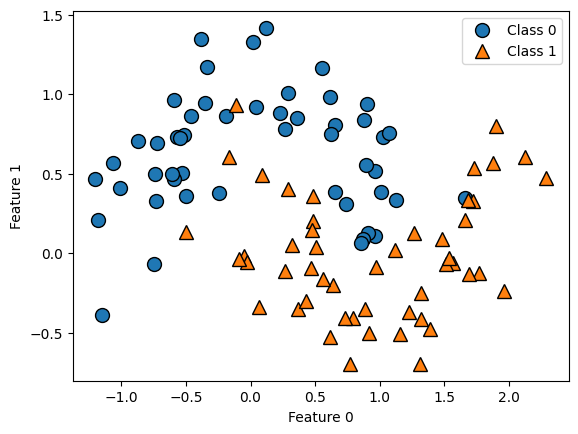

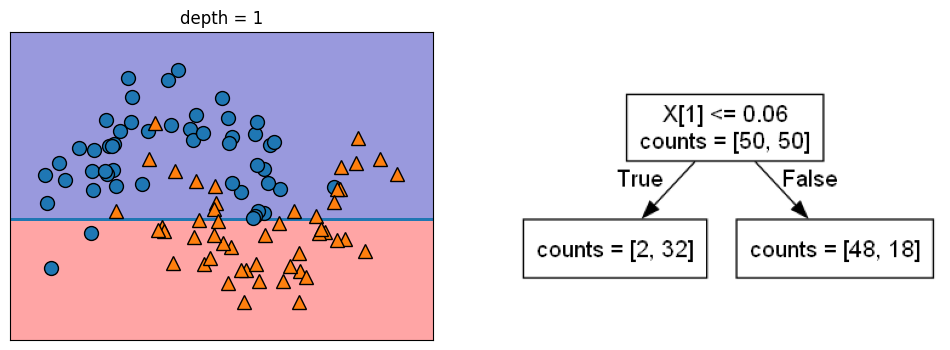

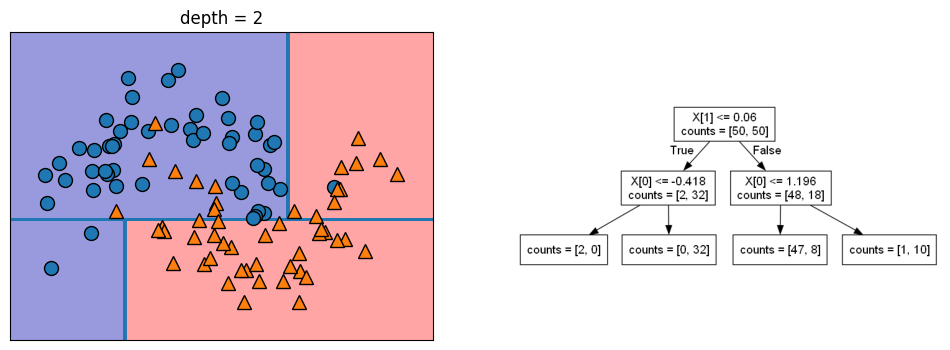

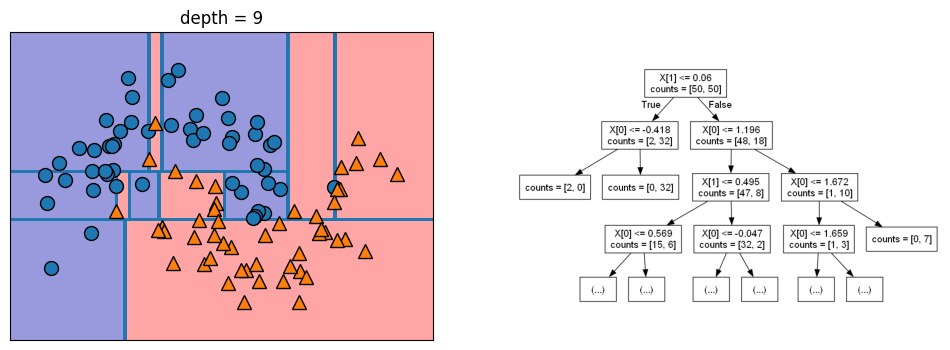

In [49]:
import mglearn
mglearn.plots.plot_tree_progressive()

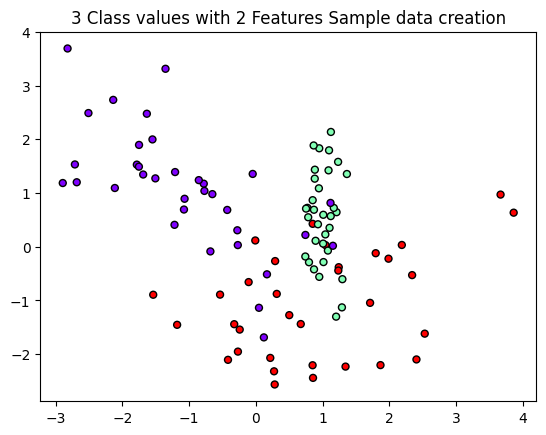

In [50]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [51]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\405\AppData\Local\Temp\ipykernel_9228\1016789203.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


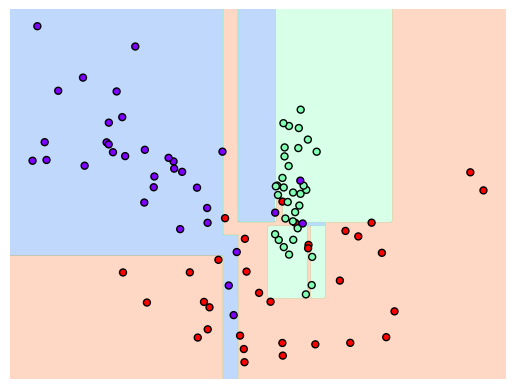

In [52]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

C:\Users\405\AppData\Local\Temp\ipykernel_9228\1016789203.py:23: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


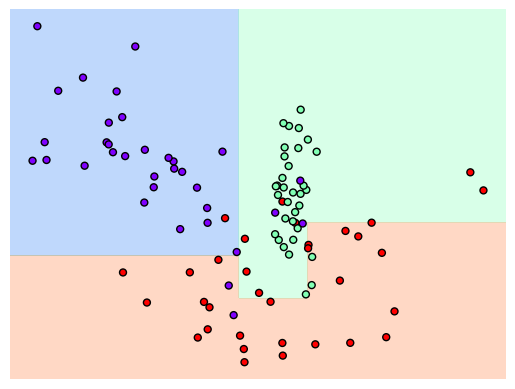

In [53]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)


#### 결정 트리에ㅐ서의 과대 적합을 막는 전략은 두가지가 있음.

1. 트리 생성을 일찍 중단시키는 전략(사전 가지치기(Pre-pruning)



<figure>
<img src='http://i.imgur.com/MVFcKwz.png' width=500 height=500>
</figure>



2. 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나, 병합하는 전략.

- Scickit-learn에서 결정트리는 DecisionTree Regressor와 DecisionTreeClassifier이 구현 되어 있음

#### 유방암 데이터로 살펴보는 Dicision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data, cancer.target,
                                               stratify=cancer.target,
                                               random_state=42)

clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
print('Accuracy on training set : {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy on training set : {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy on training set : 1.000
Accuracy on training set : 0.923


In [55]:
clf = DecisionTreeClassifier(max_depth=10,random_state=0)
clf.fit(X_train,y_train)
print('Accuracy on training set : {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy on training set : {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy on training set : 1.000
Accuracy on training set : 0.937


- 결정 트리 분석 

In [56]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree.dot',class_names=['malignant','benign'],
                feature_names=cancer.feature_names,impurity=False,filled=True)

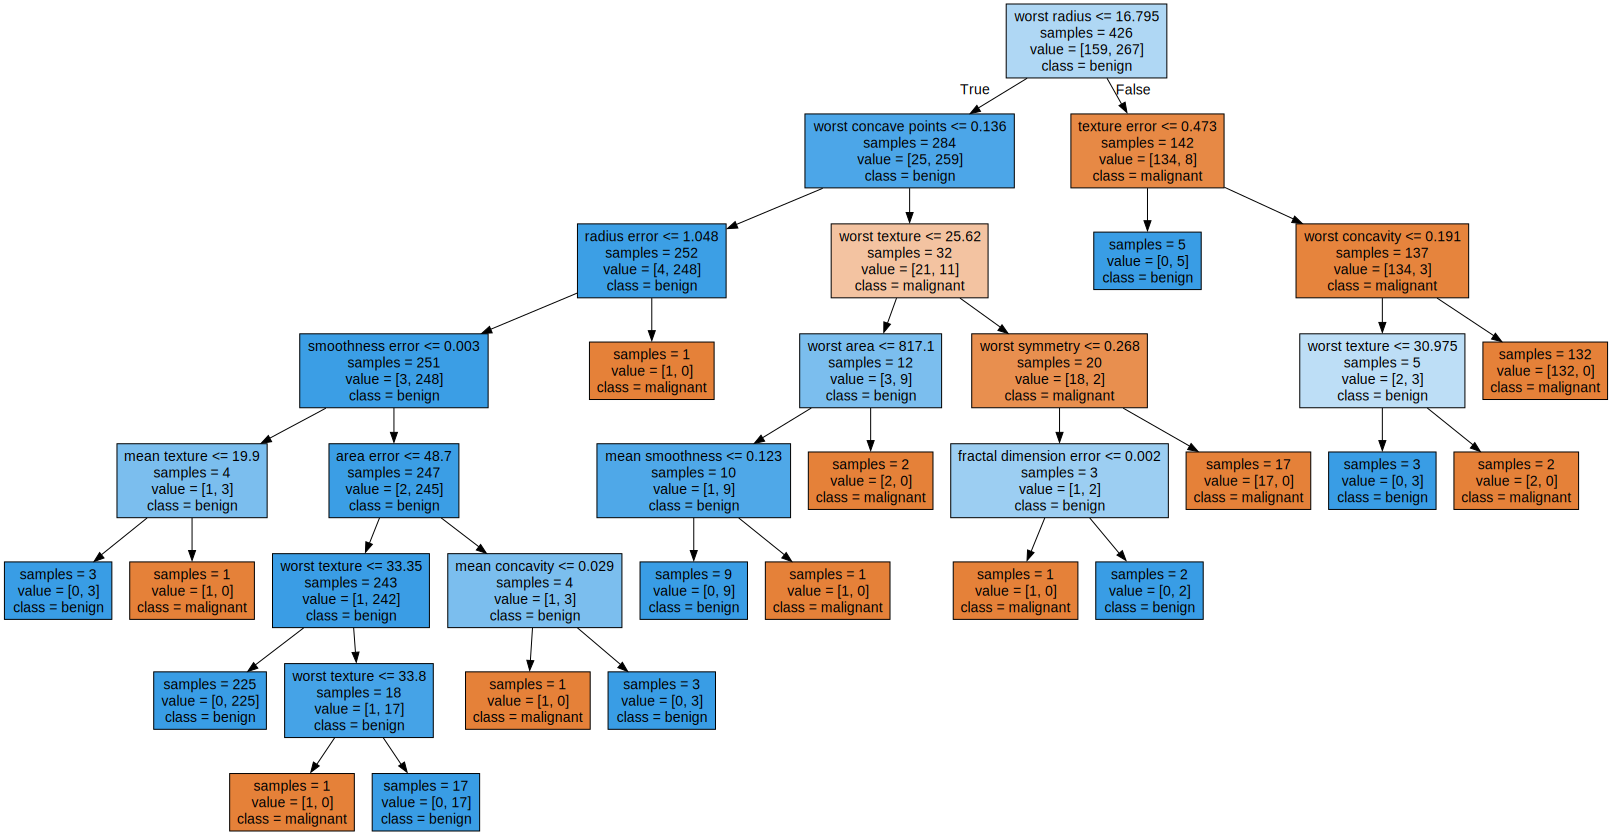

In [57]:
import graphviz
with open('tree.dot') as f:
  dot_graph=f.read()
  display(graphviz.Source(dot_graph))

- feature importance in trees

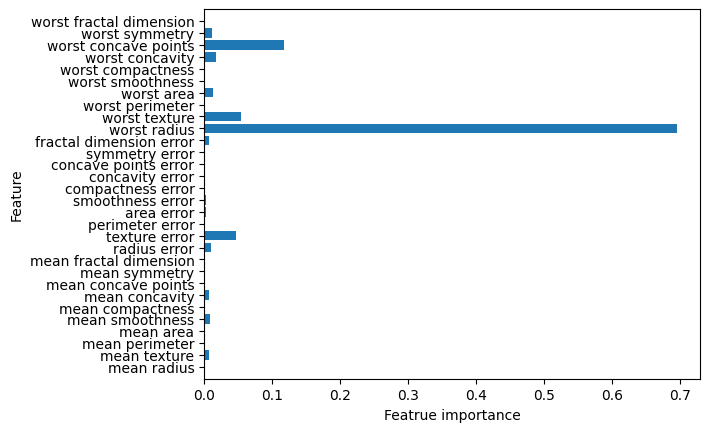

In [58]:
def plot_feature_importandce_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Featrue importance')
    plt.ylabel('Feature')
    plt.ylim(-1,n_features)
plot_feature_importandce_cancer(clf)

- 컴퓨터 메모리 각격 동향 데이터셋

x축이 날짜,y축은 해당 년도의 램(RAM) 1메가바이트당 가격

In [59]:
import numpy as np
import pandas as pd
import mglearn
import sklearn
print(np.__version__)
print(pd.__version__)
print(mglearn.__version__)
print(sklearn.__version__)

1.24.3
2.0.1
0.1.9
1.0.2


Text(0, 0.5, 'Price in $/Mbyte')

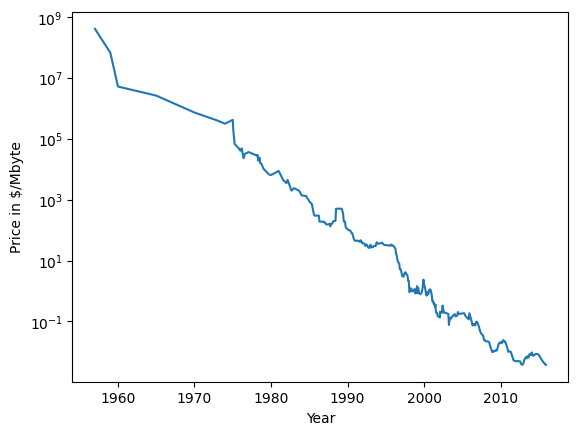

In [60]:
import os
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

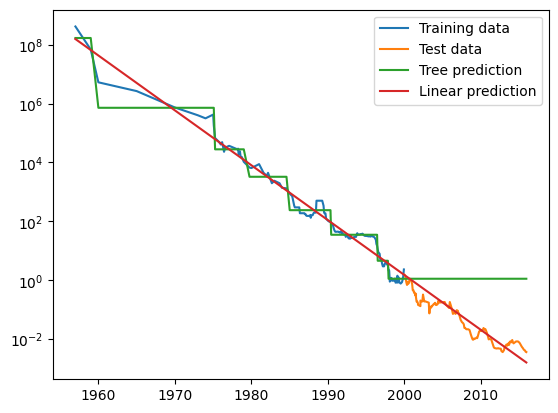

In [ ]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()